# 1. Uvod u Pandas

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows = 8

## Primer koriscenja biblioteke Pandas

In [2]:
df = pd.read_csv('data/titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Mozemo odgovoriti na neka zanimljiva pitanja...

**Koja je raspodela godina kod putnika?**

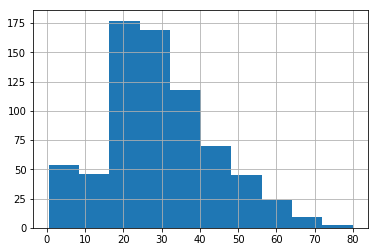

In [4]:
df['Age'].hist()

**Kako varira udeo prezivelih u odnosu na polove?**

In [5]:
df.groupby('Sex')[['Survived']].aggregate(lambda x: x.sum() / len(x))

,Survived
Sex,
female,0.742038
male,0.188908


**Kako varira u odnosu na klase?**

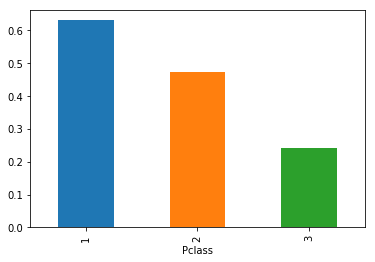

In [6]:
df.groupby('Pclass')['Survived'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

Prikazane funkcionalnosti ce biti detaljno razjasnjene kroz sledeci tutorial.

#### Provera kvaliteta vazduha

Podaci sadrze merenja kvaliteta vazduha koja se ocitavaju na svakih 1h.

In [7]:
data = pd.read_csv('data/20000101_20161231-NO2.csv', sep=';', skiprows=[1], na_values=['n/d'], index_col=0, parse_dates=True)

In [8]:
data.head()

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01 01:00:00,108.0,NaN,65.0,47.0
2000-01-01 02:00:00,104.0,60.0,77.0,42.0
2000-01-01 03:00:00,97.0,58.0,73.0,34.0
2000-01-01 04:00:00,77.0,52.0,57.0,29.0
2000-01-01 05:00:00,79.0,52.0,64.0,28.0


*Da li zagadjenje vazdhuha ima negativan trend tokom godina?*

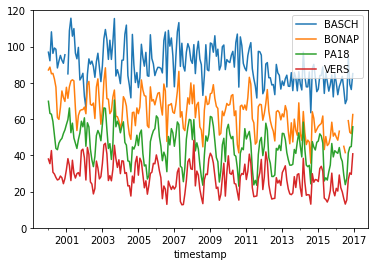

In [9]:
data['1999':].resample('M').mean().plot(ylim=[0,120])

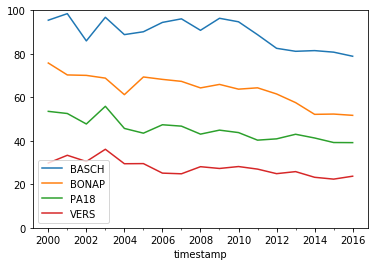

In [10]:
data['1999':].resample('A').mean().plot(ylim=[0,100])

# 2. Pandas: analiza podataka

Za intenzivan rad sa podacima, bibliteka [Pandas](http://pandas.pydata.org) igra znacajnu ulogu u Python zajednici.

Sta je `pandas`?

* Pandas se moze zamisliti kao *NumPy* sa labelama za vrste i kolone i boljom podrskom za razne tipove.
* Ukoliko ste koristili `R`, pandas je nesto slicno `data.frame`.
* Omogucava rad sa nedostajucim podacima, vremenskim serijama, omogucava razne transformacije i upite nad podacima...

Dokumentacija: http://pandas.pydata.org/pandas-docs/stable/

** Kada vam treba `pandas`? **

Kada radite sa **tabularnim ili struktuiranim** podacima (`R dataframe`, SQL tabela, Excel tabela, ...):
- Ucitavanje podataka
- Pretprocesiranje podataka
- Istrazivanje podataka
- Analiza podataka

<div class="alert alert-warning">
<b>PAZNJA!</b>: <br><br>

Pandas je odlicna biblioteka za rad sa heterogenim i tabularnim 1D/2D podacima, ali nisu svi podaci pogodni za ovaj oblik.
<ul>
<li>Ukoliko radite sa nizovnim podacima (na primer slike, numericki algoritmi...): koristite `numpy`</li>
<li>Kada radite sa visedimenzionim labeliranim podacima: biblioteka [xarray](http://xarray.pydata.org/en/stable/) moze biti korisna</li> 
</ul>
</div>

In [11]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [12]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
# Proveravanje tipova
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [15]:
# Prikaz svih vrednosti u okviru podataka
df.values

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

Okvir podataka se moze (i najcesce se tako i radi ukoliko nije iz datoteke) inicijalizovati na osnovu mape.

In [16]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
df_countries = pd.DataFrame(data)
df_countries

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


### Jednodimenzioni podaci: `Series`
`Series` je tip podataka koji se koristi za skladistenje jednodimenzionih labeliranih podataka.

In [17]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
       ... 
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [18]:
age = df['Age']

Serija takodje ima atributr `index` i `values`, ali ne i `columns` jer nema kolona. Serija se moze zamisliti kao jedna kolona `DataFrame`-a.

In [19]:
age.index

RangeIndex(start=0, stop=891, step=1)

In [20]:
age.values

array([22.  , 38.  , 26.  , 35.  , 35.  ,   nan, 54.  ,  2.  , 27.  ,
       14.  ,  4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  ,   nan,
       31.  ,   nan, 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  ,   nan,
       19.  ,   nan,   nan, 40.  ,   nan,   nan, 66.  , 28.  , 42.  ,
         nan, 21.  , 18.  , 14.  , 40.  , 27.  ,   nan,  3.  , 19.  ,
         nan,   nan,   nan,   nan, 18.  ,  7.  , 21.  , 49.  , 29.  ,
       65.  ,   nan, 21.  , 28.5 ,  5.  , 11.  , 22.  , 38.  , 45.  ,
        4.  ,   nan,   nan, 29.  , 19.  , 17.  , 26.  , 32.  , 16.  ,
       21.  , 26.  , 32.  , 25.  ,   nan,   nan,  0.83, 30.  , 22.  ,
       29.  ,   nan, 28.  , 17.  , 33.  , 16.  ,   nan, 23.  , 24.  ,
       29.  , 20.  , 46.  , 26.  , 59.  ,   nan, 71.  , 23.  , 34.  ,
       34.  , 28.  ,   nan, 21.  , 33.  , 37.  , 28.  , 21.  ,   nan,
       38.  ,   nan, 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 ,
       29.  , 24.  ,  2.  , 21.  ,   nan, 32.5 , 32.5 , 54.  , 12.  ,
         nan, 24.  ,

In [21]:
age.values[:10]

array([22., 38., 26., 35., 35., nan, 54.,  2., 27., 14.])

Elementima se moze pristupati pomocu index-a...

In [22]:
age[0]

22.0

Indeks moze biti i nesto sto nije broj

In [23]:
# Vratimo se na podatke za Titanik
df = df.set_index('Name')
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
...,...,...,...,...,...,...,...,...,...,...,...
"Graham, Miss. Margaret Edith",888,1,1,female,19.0,0,0,112053,30.0000,B42,S
"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
"Behr, Mr. Karl Howell",890,1,1,male,26.0,0,0,111369,30.0000,C148,C
"Dooley, Mr. Patrick",891,0,3,male,32.0,0,0,370376,7.7500,NaN,Q


In [24]:
age = df['Age']
age

Name
Braund, Mr. Owen Harris                                22.0
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    38.0
Heikkinen, Miss. Laina                                 26.0
Futrelle, Mrs. Jacques Heath (Lily May Peel)           35.0
                                                       ... 
Graham, Miss. Margaret Edith                           19.0
Johnston, Miss. Catherine Helen "Carrie"                NaN
Behr, Mr. Karl Howell                                  26.0
Dooley, Mr. Patrick                                    32.0
Name: Age, Length: 891, dtype: float64

Slicno biblioteci numpy, mozemo vrsiti razne transformacije nad podacima sa slicnom sintaksom.

In [25]:
age['Dooley, Mr. Patrick']

32.0

In [26]:
age * 1000

Name
Braund, Mr. Owen Harris                                22000.0
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    38000.0
Heikkinen, Miss. Laina                                 26000.0
Futrelle, Mrs. Jacques Heath (Lily May Peel)           35000.0
                                                        ...   
Graham, Miss. Margaret Edith                           19000.0
Johnston, Miss. Catherine Helen "Carrie"                   NaN
Behr, Mr. Karl Howell                                  26000.0
Dooley, Mr. Patrick                                    32000.0
Name: Age, Length: 891, dtype: float64

Prosek?

In [27]:
age.mean()

29.69911764705882

Predikatsko indeksiranje. Trazimo sve ljude koji su stariji od 70 godina.

In [28]:
age[age > 70]

Name
Goldschmidt, Mr. George B               71.0
Connors, Mr. Patrick                    70.5
Artagaveytia, Mr. Ramon                 71.0
Barkworth, Mr. Algernon Henry Wilson    80.0
Svensson, Mr. Johan                     74.0
Name: Age, dtype: float64

Brojanje pojavljivanja odredjene vrendosti (korisno za ciljnu promenljivu u podacima)

In [29]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [30]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

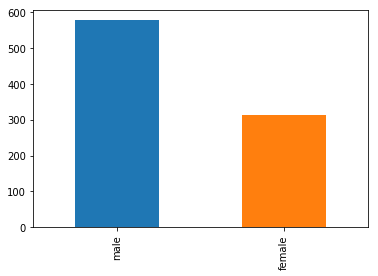

In [31]:
df['Sex'].value_counts().plot(kind='bar')

<div class="alert alert-success">

<b>VEZBANJE</b>:

 <ul>
  <li>Koja je maksimalna cena karta koja je placena? Koja je medijana?</li>
</ul>
</div>

In [32]:
# %load snippets/01-pandas_introduction31.py

In [33]:
# %load snippets/01-pandas_introduction32.py

<div class="alert alert-success">

<b>VEZBANJE</b>:

 <ul>
  <li>Izracunati odnos prezivelih u odnosu na ukupan broj putnika (Kolona 'Survived' oznacava da li je putnik preziveo (1) ili ne (0)</li>
</ul>
</div>

In [34]:
# %load snippets/01-pandas_introduction33.py

# 3. Ucitavanje i cuvanje podataka

Biblioteka `pandas` podrzava veliki broja ulazno/izlaznih formata:

* CSV, text
* SQL database
* Excel
* HDF5
* json
* html
* pickle
* sas, stata
* (parquet)
* ...

Vrlo dobar parser csv datoteka.

In [35]:
pd.read_csv?

In [36]:
df = pd.read_csv('data/titanic.csv')

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<div class="alert alert-success">

<b>VEZBANJE</b>: Ucitajte `data/20000101_20161231-NO2.csv` u DataFrame `no2`
<br><br>
Neke informacije o datoteci:
 <ul>
    <li>Proverite koji separator se koristi u datoteci?</li>
    <li>Druga vrsta ukljucuje informacije koje je neophodno preskociti (proverite `skiprows` argument)</li>
    <li>Za nedostajuce vrednosti, koristi `'n/d'` notaciju (proverite `na_values` argument)</li>
    <li>Zelimo da parsiramo `timestamp` kolonu kao date-time (proverite `parse_dates` kljucnu rec</li>
</ul>
</div>

In [38]:
# %load snippets/01-pandas_introduction39.py
no2 = pd.read_csv('data/20000101_20161231-NO2.csv', sep=';', skiprows=[1], na_values=['n/d'], index_col=0, parse_dates=True)

In [39]:
no2

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01 01:00:00,108.0,NaN,65.0,47.0
2000-01-01 02:00:00,104.0,60.0,77.0,42.0
2000-01-01 03:00:00,97.0,58.0,73.0,34.0
2000-01-01 04:00:00,77.0,52.0,57.0,29.0
...,...,...,...,...
2016-12-31 20:00:00,73.0,51.0,49.0,20.0
2016-12-31 21:00:00,61.0,51.0,48.0,16.0
2016-12-31 22:00:00,57.0,49.0,45.0,14.0
2016-12-31 23:00:00,51.0,47.0,45.0,12.0


# 4. Istrazivanje podataka

Prva tri podatka

In [40]:
no2.head(3)

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01 01:00:00,108.0,NaN,65.0,47.0
2000-01-01 02:00:00,104.0,60.0,77.0,42.0
2000-01-01 03:00:00,97.0,58.0,73.0,34.0


Poslednjih 5

In [41]:
no2.tail()

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2016-12-31 19:00:00,77.0,49.0,52.0,23.0
2016-12-31 20:00:00,73.0,51.0,49.0,20.0
2016-12-31 21:00:00,61.0,51.0,48.0,16.0
2016-12-31 22:00:00,57.0,49.0,45.0,14.0
2016-12-31 23:00:00,51.0,47.0,45.0,12.0


Informacije o podacima

In [42]:
no2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 149039 entries, 2000-01-01 01:00:00 to 2016-12-31 23:00:00
Data columns (total 4 columns):
BASCH    139949 non-null float64
BONAP    136493 non-null float64
PA18     142259 non-null float64
VERS     143813 non-null float64
dtypes: float64(4)
memory usage: 5.7 MB


Osnovne statisticke informacije

In [43]:
no2.describe()

,BASCH,BONAP,PA18,VERS
count,139949.000000,136493.000000,142259.000000,143813.000000
mean,89.270098,64.001714,45.104211,27.613227
std,36.772855,27.866767,23.212719,19.604953
min,4.000000,0.000000,2.000000,0.000000
25%,63.000000,44.000000,28.000000,13.000000
50%,87.000000,62.000000,42.000000,22.000000
75%,112.000000,81.000000,59.000000,38.000000
max,358.000000,345.000000,306.000000,197.000000


##### Brza vizuelizacija podataka

Na primer, box plot

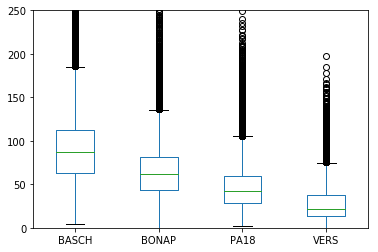

In [44]:
no2.plot(kind='box', ylim=[0,250])

Ili histogram

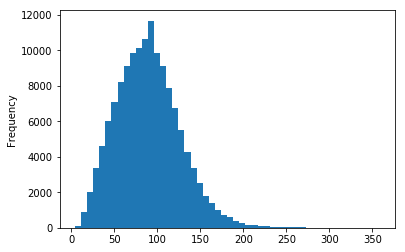

In [45]:
no2['BASCH'].plot(kind='hist', bins=50)

<div class="alert alert-success">

<b>VEZBANJE</b>: 

 <ul>
    <li>Nacrtajte raspodelu po godinama putnika na Titaniku</li>
</ul>
</div>

In [46]:
# %load snippets/01-pandas_introduction47.py

Podrazumevano crtanje ukoliko se ne navede argument `kind` je linijski plot svih kolona.

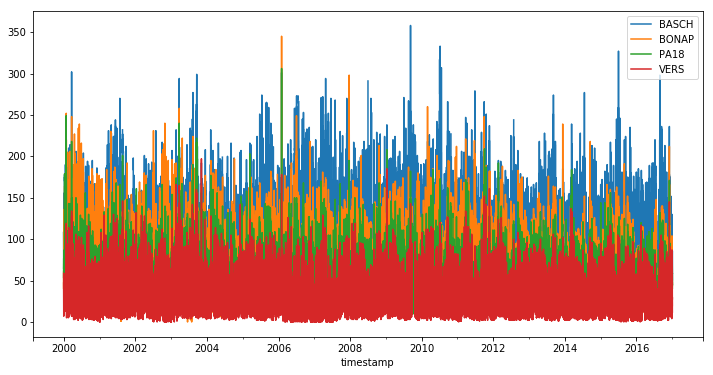

In [47]:
no2.plot(figsize=(12,6))

Primetimo da nam ovo ne daje previse korisnih informacija...
Pokusajmo da uzmemo neki podskup podataka, na primer poslednjih 500 instanci.

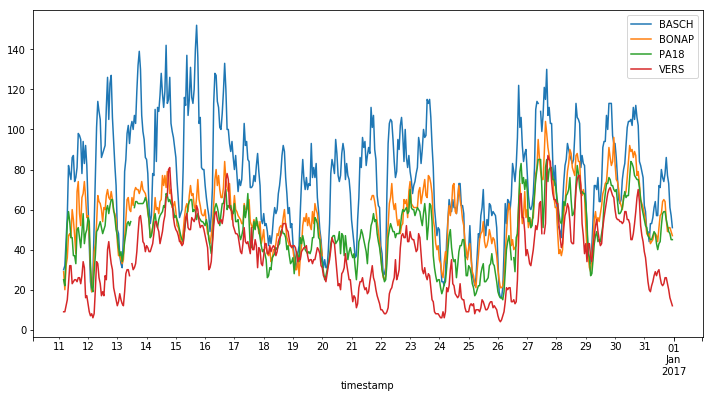

In [48]:
no2[-500:].plot(figsize=(12,6))

Podaci `no2` su vremenska serija...`pandas` ima odlicnu podrsku za rad sa vremenskih serijama, vise o njima kasnije...

# 5. Odabir i filtriranje potrebnih podataka
m

<div class="alert alert-warning">
<b>PAZNJA!</b>: <br><br>

Jedna od osnovnih funkcionalnosti bilbioteke `pandas` je takozvano *labeliranje* vrsti i kolona.
Usled toga, indeksiranje je nesto kompleksnije u odnosu na `numpy`.

<br><br>Potrebno je da napravimo razliku izmedju:

<ul>
    <li>selekcija po **labeli**</li>
    <li>selekcija po **poziciji**</li>
</ul>
</div>

In [49]:
df = pd.read_csv('data/titanic.csv')

`df[]` nam nudi neke korisne funkcionalnosti koje ce biti ilustrovane u nastavku.

Pitanje: Ako je `df` referenca na objekat, sta oznacava `df[]`?

Za `DataFrame`, osnovno indeksiranje bira kolona.

Odabir jedne kolone:

In [50]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
       ... 
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

ili vise kolona:

In [51]:
df[['Age', 'Fare']]

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
...,...,...
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000
890,32.0,7.7500


Ali ukoliko se vrsi takozvani *slajsing* (eng. slicing), vrsi se odabir po **vrstama**.

In [52]:
df[10:15]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


##### Indeksiranje pomocu `loc` i `iloc`
Kada se koristi `[]`, moguce je odabrati samo po jednoj osi (u nasem slucaju, po vrsti ili koloni ali ne i oba).

Za naprednije indeksiranje, postoje dodatni atributi:
- `loc`: odabir po labeli
- `iloc`: odabir po poziciji

In [53]:
df = df.set_index('Name')
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
...,...,...,...,...,...,...,...,...,...,...,...
"Graham, Miss. Margaret Edith",888,1,1,female,19.0,0,0,112053,30.0000,B42,S
"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
"Behr, Mr. Karl Howell",890,1,1,male,26.0,0,0,111369,30.0000,C148,C
"Dooley, Mr. Patrick",891,0,3,male,32.0,0,0,370376,7.7500,NaN,Q


In [55]:
# Trazimo informacije o putniku po imenu...
print(df.loc['Bonnell, Miss. Elizabeth'])

PassengerId        12
Survived            1
Pclass              1
Sex            female
                ...  
Ticket         113783
Fare            26.55
Cabin            C103
Embarked            S
Name: Bonnell, Miss. Elizabeth, Length: 11, dtype: object


In [56]:
# Koliko je putnik kojeg trazio platio kartu?
print(df.loc['Bonnell, Miss. Elizabeth', 'Fare'])

26.55


In [57]:
df.loc['Bonnell, Miss. Elizabeth':'Andersson, Mr. Anders Johan', :]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Bonnell, Miss. Elizabeth",12,1,1,female,58.0,0,0,113783,26.550,C103,S
"Saundercock, Mr. William Henry",13,0,3,male,20.0,0,0,A/5. 2151,8.050,NaN,S
"Andersson, Mr. Anders Johan",14,0,3,male,39.0,1,5,347082,31.275,NaN,S


In [63]:
# Trazimo putnike od jednog imena do drugog
df.loc['Bonnell, Miss. Elizabeth':'Vestrom, Miss. Hulda Amanda Adolfina']
# df.loc['Bonnell, Miss. Elizabeth':'Vestrom, Miss. Hulda Amanda Adolfina', :]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Bonnell, Miss. Elizabeth",12,1,1,female,58.0,0,0,113783,26.5500,C103,S
"Saundercock, Mr. William Henry",13,0,3,male,20.0,0,0,A/5. 2151,8.0500,NaN,S
"Andersson, Mr. Anders Johan",14,0,3,male,39.0,1,5,347082,31.2750,NaN,S
"Vestrom, Miss. Hulda Amanda Adolfina",15,0,3,female,14.0,0,0,350406,7.8542,NaN,S


Odabir po poziciji koristeci `iloc` radi slicno kao kada se indeksiraju numpy nizovi.

In [67]:
# Uzimamo prva dva podatka (vrste 0 i 1), a u njima uzimamo kolone 1 i 2 (indeksira se od 0 za kolone takodje)
df.iloc[0:2, 1:3]

,Survived,Pclass
Name,,
"Braund, Mr. Owen Harris",0,3
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,1


Ova indeksiranja mozemo koristiti i da promenimo vrednosti.

In [68]:
df.loc['Braund, Mr. Owen Harris', 'Survived'] = 100

In [71]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,100,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
...,...,...,...,...,...,...,...,...,...,...,...
"Graham, Miss. Margaret Edith",888,1,1,female,19.0,0,0,112053,30.0000,B42,S
"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
"Behr, Mr. Karl Howell",890,1,1,male,26.0,0,0,111369,30.0000,C148,C
"Dooley, Mr. Patrick",891,0,3,male,32.0,0,0,370376,7.7500,NaN,Q


#### Filtriranje (boolean indexing)

Povremeno nam je potrebno da odaberemo vrste koje zadovoljavaju neki uslov
(poput WHERE klauze u SQL-u).

Osnovna ideja je proslediti takozvani *indekser*,
odnosno boleanski jednodimenzioni niz koji poseduje
vrednost `True` na poziciji na kojoj se nalazi element
koji zadovoljava uslov, a `False` element koji ne zadovoljava.

In [73]:
df['Fare'] > 50

Name
Braund, Mr. Owen Harris                                False
Cumings, Mrs. John Bradley (Florence Briggs Thayer)     True
Heikkinen, Miss. Laina                                 False
Futrelle, Mrs. Jacques Heath (Lily May Peel)            True
                                                       ...  
Graham, Miss. Margaret Edith                           False
Johnston, Miss. Catherine Helen "Carrie"               False
Behr, Mr. Karl Howell                                  False
Dooley, Mr. Patrick                                    False
Name: Fare, Length: 891, dtype: bool

In [74]:
df[df['Fare'] > 50]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"McCarthy, Mr. Timothy J",7,0,1,male,54.0,0,0,17463,51.8625,E46,S
"Fortune, Mr. Charles Alexander",28,0,1,male,19.0,3,2,19950,263.0000,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...
"Sage, Miss. Dorothy Edith ""Dolly""",864,0,3,female,NaN,8,2,CA. 2343,69.5500,NaN,S
"Roebling, Mr. Washington Augustus II",868,0,1,male,31.0,0,0,PC 17590,50.4958,A24,S
"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",872,1,1,female,47.0,1,1,11751,52.5542,D35,S
"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",880,1,1,female,56.0,0,1,11767,83.1583,C50,C


<div class="alert alert-success">

<b>VEZBANJE</b>:

 <ul>
    <li>Koristeci titanik skup podataka, odaberite sve vrste za muske putnike i izracunajte prosek godina tih putnika.</li>
    <li>Uradite isto i za zenske putnike.</li>
</ul>
</div>

In [75]:
df = pd.read_csv("data/titanic.csv")
df = df.set_index('Name')
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
# %load snippets/01-pandas_introduction63.py

In [77]:
# %load snippets/01-pandas_introduction64.py

In [78]:
# %load snippets/01-pandas_introduction65.py

<div class="alert alert-success">

<b>VEZBANJE</b>:

<ul>
    <li>Koristeci titanik skup, pronadjite koliko je putnika starijih od 70 godina bilo pristuno na Titaniku?</li>
</ul>
</div>

In [79]:
# %load snippets/02-pandas_introduction66.py

In [80]:
# %load snippets/01-pandas_introduction67.py

# 6. Operacija group-by

#### Kratak prikaz group-by operacije (split-apply-combine).

In [81]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,key,data
0,A,0
1,B,5
2,C,10
3,A,5
...,...,...
5,C,15
6,A,10
7,B,15
8,C,20


### Agregatne funkcije
Kada se analiziraju podaci, cesto se izracunavaju sumarne statistike (na primer prosek, maksimum...).
Kao sto je prikazano prethodno, mozemo jednostavno da izracunamo takve statistike za seriju (`Series`) ili kolonu
koristeci neki od postojecih metoda iz biblioteke `pandas`.

In [82]:
df['data'].sum()

90

Ipak, u vecini prakticnih primena, pokazuje se da u podacima postoje odredjene grupe, a nase izracunavanje sumarnih statistika
zelimo da izvedemo za svako od postojecih grupa pojedinacno.

U prethodnom primeru, dataframe `df` sadrzi kolonu `key` koja ima tri moguce vrednosti: `A`, `B` i `C`.
Pretpostavimo da zelimo da izracunamo sumu vrednosti za svaku od grupa ponaosob.

Osnovna ideja bi bila:


In [83]:
for key in ['A', 'B', 'C']:
    print(key, df[df['key'] == key]['data'].sum())

A 15
B 30
C 45


Ipak, nema potrebe da mi eksplicitno iteriramo kroz grupe (i razmisljamo o tome koje su moguce vrednosti tih podataka).
Prikazani kod predstavlja takozvanu `group-by` operaciju.


### Group-by: primena funkcija po grupi

**Group by** koncept: Zelimo da *primenimo istu funkciju na podskupovima podataka koji su dobijeni na osnovu naseg parametra za razdvajanje*.

Ova operacija se jos naziva podeli-primeni-spoji (eng. *split-apply-combine*) operacija, koja se sastoji iz sledecih koraka:
- **split**: razdvajanje podataka u neke grupe na osnovu zadatog kriterijuma (`key` u prethodnom primeru)
- **apply**: primenjivanje funkcije nad grupama
- **combine**: objedinjavanje dobijenih rezultata

<img src="img/splitApplyCombine.png">

Dakle, slicno kao `GROUP BY` u jeziku `SQL`.

In [85]:
df.groupby('key').sum()

,data
key,
A,15
B,30
C,45


In [86]:
df.groupby('key').aggregate(np.sum)

,data
key,
A,15
B,30
C,45


In [87]:
df.groupby('key')['data'].sum()

key
A    15
B    30
C    45
Name: data, dtype: int64

### Primenjivanje grupby operacije na titanik podacima

In [88]:
df = pd.read_csv('data/titanic.csv')

In [89]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<div class="alert alert-success">

<b>VEZBANJE</b>:

 <ul>
    <li>Izracunajte prosecne godine za svaku pol koristeci `groupby`.</li>
</ul>
</div>

In [91]:
# %load snippets/01-pandas_introduction76.py

<div class="alert alert-success">

<b>VEZBANJE</b>:

 <ul>
    <li>Izracunajte prosek prezivelih od svih putnika.</li>
</ul>
</div>

In [93]:
# %load snippets/01-pandas_introduction77.py

<div class="alert alert-success">

<b>VEZBANJE</b>:

 <ul>
    <li>Izracunajte prosek prezivelih putnika koji imaju najvise 25 godina.</li>
</ul>
</div>

In [94]:
# %load snippets/01-pandas_introduction78.py

<div class="alert alert-success">

<b>VEZBANJE</b>:

 <ul>
    <li>Koja je razlika u proseku prezivelih u odnosu na polove?</li>
</ul>
</div>

In [95]:
# %load snippets/01-pandas_introduction79.py

<div class="alert alert-success">

<b>VEZBANJE:</b>:

 <ul>
    <li>Da li prosek prezivelih varira u odnosu na klasu?</li>
    <li>Nacrtajte bar plot koji vizualizuje rezultate za sve 3 klase</li>
</ul>
</div>

In [96]:
# %load snippets/01-pandas_introduction80.py

<div class="alert alert-success">

<b>VEZBANJE</b>:

 <ul>
    <li>Napravite bar plot koji vizualizuje prosecnu cenu placenu od strane ljudi u zavisnosti od njihovih godina.</li>
    <li>Kolona age se moze podeliti u zasebne klase koristeci `pd.cut` funkciju (dato u nastavku)</li>
</ul>
</div>

In [97]:
df['AgeClass'] = pd.cut(df['Age'], bins=np.arange(0,90,10))

In [98]:
# %load snippets/01-pandas_introduction82.py

# 7. Rad sa serijama

In [99]:
no2 = pd.read_csv('data/20000101_20161231-NO2.csv', sep=';', skiprows=[1], na_values=['n/d'], index_col=0, parse_dates=True)

Kada podaci imaju indeks tipa `DatetimeIndex`, biblioteka `pandas` moze da pruzi razne udobne funkcije za rad sa serijama.

In [100]:
no2.index

DatetimeIndex(['2000-01-01 01:00:00', '2000-01-01 02:00:00',
               '2000-01-01 03:00:00', '2000-01-01 04:00:00',
               '2000-01-01 05:00:00', '2000-01-01 06:00:00',
               '2000-01-01 07:00:00', '2000-01-01 08:00:00',
               '2000-01-01 09:00:00', '2000-01-01 10:00:00',
               ...
               '2016-12-31 14:00:00', '2016-12-31 15:00:00',
               '2016-12-31 16:00:00', '2016-12-31 17:00:00',
               '2016-12-31 18:00:00', '2016-12-31 19:00:00',
               '2016-12-31 20:00:00', '2016-12-31 21:00:00',
               '2016-12-31 22:00:00', '2016-12-31 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=149039, freq=None)

Indeksiranje vremenskih serija radi sa stringovima:

In [101]:
no2['2010-01-01 09:00' : '2010-01-01 12:00']

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2010-01-01 09:00:00,31.0,27.0,28.0,14.0
2010-01-01 10:00:00,41.0,31.0,30.0,14.0
2010-01-01 11:00:00,48.0,32.0,33.0,16.0
2010-01-01 12:00:00,63.0,33.0,39.0,19.0


Izuzetno udobna stvar je parcijalno stringovno indeksiranje (eng. *partial string indexing*),
odnosno nismo u obavezi da navedemo pun string (odnosno datum i vreme).

In [102]:
no2['2012-01' : '2012-03']

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2012-01-01 00:00:00,44.0,34.0,32.0,7.0
2012-01-01 01:00:00,56.0,35.0,29.0,9.0
2012-01-01 02:00:00,50.0,36.0,29.0,7.0
2012-01-01 03:00:00,46.0,34.0,22.0,8.0
...,...,...,...,...
2012-03-31 20:00:00,61.0,55.0,29.0,17.0
2012-03-31 21:00:00,46.0,49.0,32.0,14.0
2012-03-31 22:00:00,56.0,41.0,27.0,14.0
2012-03-31 23:00:00,59.0,51.0,29.0,13.0


Datumu i vremenu mozemo pristupiti preko indeksa:

In [103]:
no2.index.hour

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='timestamp', length=149039)

In [104]:
no2.index.year

Int64Index([2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
            ...
            2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016],
           dtype='int64', name='timestamp', length=149039)

### Resample

Vrlo mocna funkcionalnost je funkcija `resample` koja omogucava
da se promeni *frekvencija* serije, na primer da se podaci prikupljeni
za jedan dan ukrupne u jedan podatak (na primer izracuna se prosek).

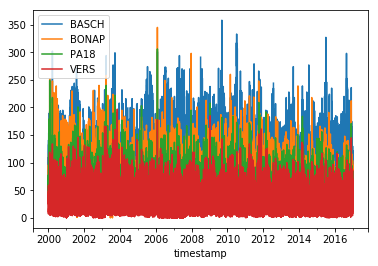

In [105]:
no2.plot()

Serija `no2` ima frekvencija od 1 sat. Pretpostavimo da zelimo
da to promenimo na 1 dan. Neophodno je da 24 merenja za jedan dan
ukrupnimo u jedan podatak.


In [106]:
no2.head()

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01 01:00:00,108.0,NaN,65.0,47.0
2000-01-01 02:00:00,104.0,60.0,77.0,42.0
2000-01-01 03:00:00,97.0,58.0,73.0,34.0
2000-01-01 04:00:00,77.0,52.0,57.0,29.0
2000-01-01 05:00:00,79.0,52.0,64.0,28.0


In [107]:
no2.resample('D').mean().head()

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01,83.173913,53.772727,64.695652,36.521739
2000-01-02,78.708333,59.250000,63.708333,17.166667
2000-01-03,82.333333,73.541667,61.000000,23.083333
2000-01-04,78.500000,73.708333,48.863636,23.791667
2000-01-05,94.291667,90.458333,60.166667,28.214286


Mozemo koristiti u drugu funkciju da ukrupnimo podatke, na primer max.

In [108]:
no2.resample('D').max().head()

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01,109.0,62.0,77.0,59.0
2000-01-02,109.0,96.0,78.0,45.0
2000-01-03,120.0,102.0,72.0,37.0
2000-01-04,115.0,107.0,78.0,43.0
2000-01-05,141.0,115.0,82.0,41.0


Vise o stringovima za `resample`: http://pandas.pydata.org/pandas-docs/dev/timeseries.html#offset-aliases  

Moguce je stringove kombinovati i sa brojevima, na primer `'10D'`.

Jos neki primeri...

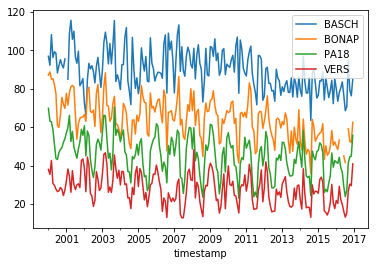

In [109]:
no2.resample('M').mean().plot()

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2012-01-01,"AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)"
2012-01-02,"AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)"
2012-01-03,"AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)"
2012-01-04,"AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)"
...,...,...,...,...
2012-12-28,"AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)"
2012-12-29,"AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)"
2012-12-30,"AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)"
2012-12-31,"AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)"


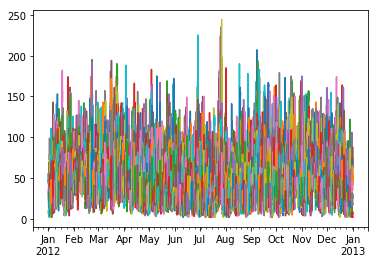

In [110]:
no2['2012'].resample('D').plot()

<div class="alert alert-success">

<b>VEZBANJE</b>: 

 <ul>
    <li>Za godinu 2009 i podataka verse, uraditi resample po mesecu, i iscrtati
        prosek i medijanu za svaki mesec.</li>
</ul>
</div>

TIP: Mozete funkciji `aggregate` (ili `agg` skraceno) proslediti listu funkcija koje zelite da primeni.

In [115]:
# %load snippets/01-pandas_introduction95.py

<div class="alert alert-success">

<b>VEZBANJE</b>:

 <ul>
    <li>Izracunati prosek za svaku godinu za razlicite kolone</li>
    <li>Izracunati prosek ovih proseka</li>
    <li>Iscrtati sve na jednom grafikonu</li>
</ul>
</div>

In [123]:
# %load snippets/01-pandas_introduction96.py

<div class="alert alert-success">

<b>VEZBANJE</b>: mesecni profil za razlicite vrednosti (kolone).

 <ul>
    <li>Dodajte `month` kolonu u dataframe</li>
    <li>Grupisite po mesecu da dobijete tipicne mesecne prosek tokom godina</li>
</ul>
</div>

Prvo, dodajemo kolonu koja oznacava mesec (broj od 1 do 12)

In [127]:
# %load snippets/01-pandas_introduction97.py

Potom izracunavamo prosek svakom meseca tokom godina:

In [ ]:
# %load snippets/01-pandas_introduction98.py
no2.groupby('month').mean()

Iscrtavamo prosek radi vizuelizacije:

In [131]:
# %load snippets/01-pandas_introduction99.py